## Build A Basic  Chatbot With Langgraph (GraphAPI)

In [61]:
print("hello")

hello


In [62]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

# (reducer) add_messages:- for add list of messages like. we can keep list of messages and adding the messages into it within a session 


In [63]:
class State(TypedDict):
    # Messages have the type "List". the add_messages function
    # in the annotation defines how this state key should be updated
    # (in this case , it appends messages to the list, rather than overwriting them)
    messages: Annotated[list,add_messages]

graph_builder = StateGraph(State)

In [64]:
import os 
from dotenv import load_dotenv

load_dotenv()

True

In [65]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

llm = ChatGroq(model='llama-3.1-8b-instant')

In [66]:
llm2=init_chat_model=("groq:llama-3.1-8b-instant")

In [67]:
## Node functionality
def chatbot(state: State):
    return {'messages': [llm.invoke(state['messages'])]}

In [68]:
graph_builder

In [69]:
graph_builder.add_node("llmChatBot",chatbot)

graph_builder.add_edge(START,'llmChatBot')
graph_builder.add_edge('llmChatBot',END)

In [70]:
# compilation
graph = graph_builder.compile()

In [71]:
graph.invoke({'messages': 'hii'})
graph.invoke({'messages': 'ok tell me about AI'})

{'messages': [HumanMessage(content='ok tell me about AI', additional_kwargs={}, response_metadata={}, id='be15dc56-d6e9-4af1-8a7b-6d4eefa526f8'),
  AIMessage(content="Artificial Intelligence (AI) is a broad field that focuses on creating intelligent machines that can perform tasks that typically require human intelligence. This includes learning, problem-solving, decision-making, perception, and language understanding.\n\n**Types of AI:**\n\n1. **Narrow or Weak AI:** Designed to perform a specific task, such as facial recognition, language translation, or playing chess. Narrow AI is trained on a particular dataset and is not capable of general reasoning or learning beyond its specific task.\n2. **General or Strong AI:** A hypothetical AI system that possesses the ability to understand, learn, and apply knowledge across a wide range of tasks, similar to human intelligence.\n3. **Superintelligence:** A hypothetical AI system that significantly surpasses human intelligence in all domains.

In [72]:
graph.invoke({'messages': 'ok tell me about AI'})

{'messages': [HumanMessage(content='ok tell me about AI', additional_kwargs={}, response_metadata={}, id='2795c0b1-3750-488e-b7ff-eeeac8a520a5'),
  AIMessage(content='Artificial Intelligence (AI) is a rapidly growing field that involves the development of computer systems capable of performing tasks that would typically require human intelligence. These tasks include:\n\n1. **Learning**: AI systems can learn from data, identify patterns, and improve their performance over time.\n2. **Reasoning**: AI systems can draw conclusions, make decisions, and solve problems based on the data they have been trained on.\n3. **Perception**: AI systems can interpret and understand data from sensors, such as images, speech, and text.\n4. **Action**: AI systems can take actions, such as moving a robot arm or sending an email.\n\nTypes of AI:\n\n1. **Narrow or Weak AI**: This type of AI is designed to perform a specific task, such as image recognition, language translation, or playing chess.\n2. **Gener

## Chat bot with tools

In [73]:
from langchain_tavily import TavilySearch

tool = TavilySearch(max_result=2)
tool.invoke("What is langgraph")

{'query': 'What is langgraph',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.datacamp.com/tutorial/langgraph-tutorial',
   'title': 'LangGraph Tutorial: What Is LangGraph and How to Use It?',
   'content': 'LangGraph is a library within the LangChain ecosystem that provides a framework for defining, coordinating, and executing multiple LLM agents (or chains) in a structured and efficient manner. By managing the flow of data and the sequence of operations, LangGraph allows developers to focus on the high-level logic of their applications rather than the intricacies of agent coordination. Whether you need a chatbot that can handle various types of user requests or a multi-agent system that performs complex tasks, LangGraph provides the tools to build exactly what you need. LangGraph significantly simplifies the development of complex LLM applications by providing a structured framework for managing state and coordinating agent interaction

In [74]:
# the above is docstring: once we bind the tools and function then llm can understand what is the functionality

def multiply(a: int, b: int) -> int:
    """
    Multiply a and b.

    Args:
        a (int): first integer
        b (int): second integer

    Returns:
        int: output integer
    """
    return a * b

    

In [75]:
tools=[tool, multiply]

In [76]:
llm_with_tool=llm.bind_tools(tools)

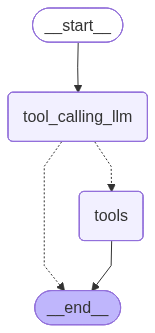

In [77]:
## state graph
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

## Node definition
def tool_calling_llm(state:State):
    return {'messages':[llm_with_tool.invoke(state['messages'])]}

## Graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## edges
builder.add_edge(START,'tool_calling_llm')
builder.add_conditional_edges('tool_calling_llm',
        # If the latest message (result) from assistant is a tool call -> tools_condtion routes to tools
        # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
        tools_condition
)
builder.add_edge('tools',END)

## compilation
graph = builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))


In [78]:
res = graph.invoke({'messages': 'what is the recent ai news'})
res['messages'][-1]

ToolMessage(content='{"query": "recent AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://pitchbook.com/news/articles/10-of-the-biggest-winners-from-2025s-ai-boom", "title": "10 of the biggest winners from 2025’s AI boom - PitchBook", "score": 0.69573146, "published_date": "Wed, 24 Dec 2025 13:00:00 GMT", "content": "Investors have always had an affinity for technologies that feel like science fiction, but 2025 has taken robotics to new heights. More startups are utilizing LLMs to create tailor-made software for robots, which can be deployed in industries ranging from construction to senior care.\\n\\nRecent News\\n\\n### GPs’ resolution for 2026: Stop talking about AI and start using it\\n\\nFor fund managers, delaying the adoption of this technology will be more costly than its implementation.\\n\\n1 hour ago [...] Elite AI experts have never been more in demand, and this year’s slew of AI “acqui-hires” confirms it. Meta made headlines i

In [79]:
for m in res['messages']:
    m.pretty_print()

================================ Human Message =================================

what is the recent ai news
================================== Ai Message ==================================
Tool Calls:
  tavily_search (fjhy1w38j)
 Call ID: fjhy1w38j
  Args:
    query: recent AI news
    search_depth: advanced
    topic: news
================================= Tool Message =================================
Name: tavily_search

{"query": "recent AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://pitchbook.com/news/articles/10-of-the-biggest-winners-from-2025s-ai-boom", "title": "10 of the biggest winners from 2025’s AI boom - PitchBook", "score": 0.69573146, "published_date": "Wed, 24 Dec 2025 13:00:00 GMT", "content": "Investors have always had an affinity for technologies that feel like science fiction, but 2025 has taken robotics to new heights. More startups are utilizing LLMs to create tailor-made software for robots, which can be deploy

In [80]:
res1 = graph.invoke({'messages': 'what is 2 multiply by 3 & give recent news'}) ## docstring

In [81]:
for m in res1['messages']:
    m.pretty_print()

================================ Human Message =================================

what is 2 multiply by 3 & give recent news
================================== Ai Message ==================================
Tool Calls:
  multiply (p36qqh390)
 Call ID: p36qqh390
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: multiply

6


## ReAct Architechture

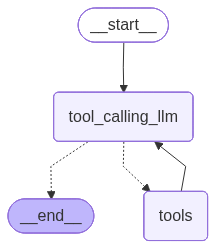

In [82]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

## Node definition
def tool_calling_llm(state:State):
    return {'messages':[llm_with_tool.invoke(state['messages'])]}

## Graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## edges
builder.add_edge(START,'tool_calling_llm')
builder.add_conditional_edges('tool_calling_llm',
        # If the latest message (result) from assistant is a tool call -> tools_condtion routes to tools
        # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
        tools_condition
)
builder.add_edge('tools','tool_calling_llm')

## compilation
graph = builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [83]:
res1 = graph.invoke({'messages': 'what is 2 multiply by 3 & give recent news'}) ## docstring
for m in res1['messages']:
    m.pretty_print()

BadRequestError: Error code: 400 - {'error': {'message': 'tool call validation failed: parameters for tool tavily_search did not match schema: errors: [`/exclude_domains`: expected array, but got string, `/exclude_domains`: expected null, but got string, `/include_images`: expected boolean, but got string, `/include_images`: expected null, but got string, `/time_range`: value must be one of "day", "week", "month", "year", `/time_range`: expected null, but got string, `/include_domains`: expected array, but got string, `/include_domains`: expected null, but got string]', 'type': 'invalid_request_error', 'code': 'tool_use_failed', 'failed_generation': '<function=tavily_search>{"query": "recent news", "topic": "news", "search_depth": "advanced", "include_images": "false", "start_date": "null", "end_date": "null", "time_range": "null", "include_domains": "null", "exclude_domains": "null"}</function>'}}

## Adding Memory In Agentic Graph

- solves mejor problem persistence checkpointing
- Persistence = the agent’s ability to remember state beyond a single request or crash
- Checkpointing = saving the agent’s state at specific steps

In [84]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

## Node definition
def tool_calling_llm(state:State):
    return {'messages':[llm_with_tool.invoke(state['messages'])]}

## Graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## edges
builder.add_edge(START,'tool_calling_llm')
builder.add_conditional_edges('tool_calling_llm',
        # If the latest message (result) from assistant is a tool call -> tools_condtion routes to tools
        # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
        tools_condition
)
builder.add_edge('tools',END)

## compilation
graph = builder.compile(checkpointer=memory)



In [88]:
config = {
    "configurable": {
        "thread_id": "2"
    }
}


res = graph.invoke(
    {"messages": "Hi my name is A."},
    config=config
)

In [89]:
res

{'messages': [HumanMessage(content='Hi my name is A.', additional_kwargs={}, response_metadata={}, id='d1294ff0-26d6-4863-9272-5f88f15dfbef'),
  AIMessage(content='Nice to meet you, A. Is there something I can help you with today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 1711, 'total_tokens': 1729, 'completion_time': 0.024457252, 'completion_tokens_details': None, 'prompt_time': 0.12035768, 'prompt_tokens_details': None, 'queue_time': 0.05286147, 'total_time': 0.144814932}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b542d-952e-7652-a1e4-3e3e5cc37bab-0', usage_metadata={'input_tokens': 1711, 'output_tokens': 18, 'total_tokens': 1729})]}

In [90]:
config = {
    "configurable": {
        "thread_id": "2"
    }
}


res = graph.invoke(
    {"messages": "Hi what is my name?"},
    config=config
)

res['messages'][-1].content

'Your name is A.'